# Description

This gallery notebook is used to verify that `amp/core/plotting` functions display plots correctly.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Imports

In [5]:
import logging

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import core.plotting.misc_plotting as cplmiplo
import core.plotting.test.test_plots as cptetepl
import core.plotting.visual_stationarity_test as cpvistte
import core.plotting.test.test_plots as cptetepl
import core.plotting.correlation as cplocorr

import helpers.hdbg as hdbg
import helpers.henv as henv
import helpers.hprint as hprint

In [3]:
hdbg.init_logger(verbosity=logging.INFO)

_LOG = logging.getLogger(__name__)

_LOG.info("%s", henv.get_system_signature()[0])

hprint.config_notebook()

INFO: > cmd='/venv/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/.local/share/jupyter/runtime/kernel-572e6f6d-b46e-4472-9f2f-8e96d199ca78.json'
-----------------------------------------------------------------------------
This code is not in sync with the container:
code_version='1.4.3' != container_version='1.4.0'
-----------------------------------------------------------------------------
You need to:
- merge origin/master into your branch with `invoke git_merge_master`
- pull the latest container with `invoke docker_pull`
INFO  # Git
  branch_name='SorrTask485_Unit_test_plot_spectrum'
  hash='732534bf5'
  # Last commits:
    * 732534bf5 hhxjqm   SorrTask485_Unit_test_plot_spectrum                               (   5 hours ago) Tue Aug 1 14:22:38 2023  (HEAD -> SorrTask485_Unit_test_plot_spectrum, origin/SorrTask485_Unit_test_plot_spectrum)
    * c93109dee Sonaal   Expose realtime_client_example1 issue #475 (#476)                 (   6 hours ago) Tue Aug 1 13:53:42 2023

# Plots

## `plot_histograms_and_lagged_scatterplot()`

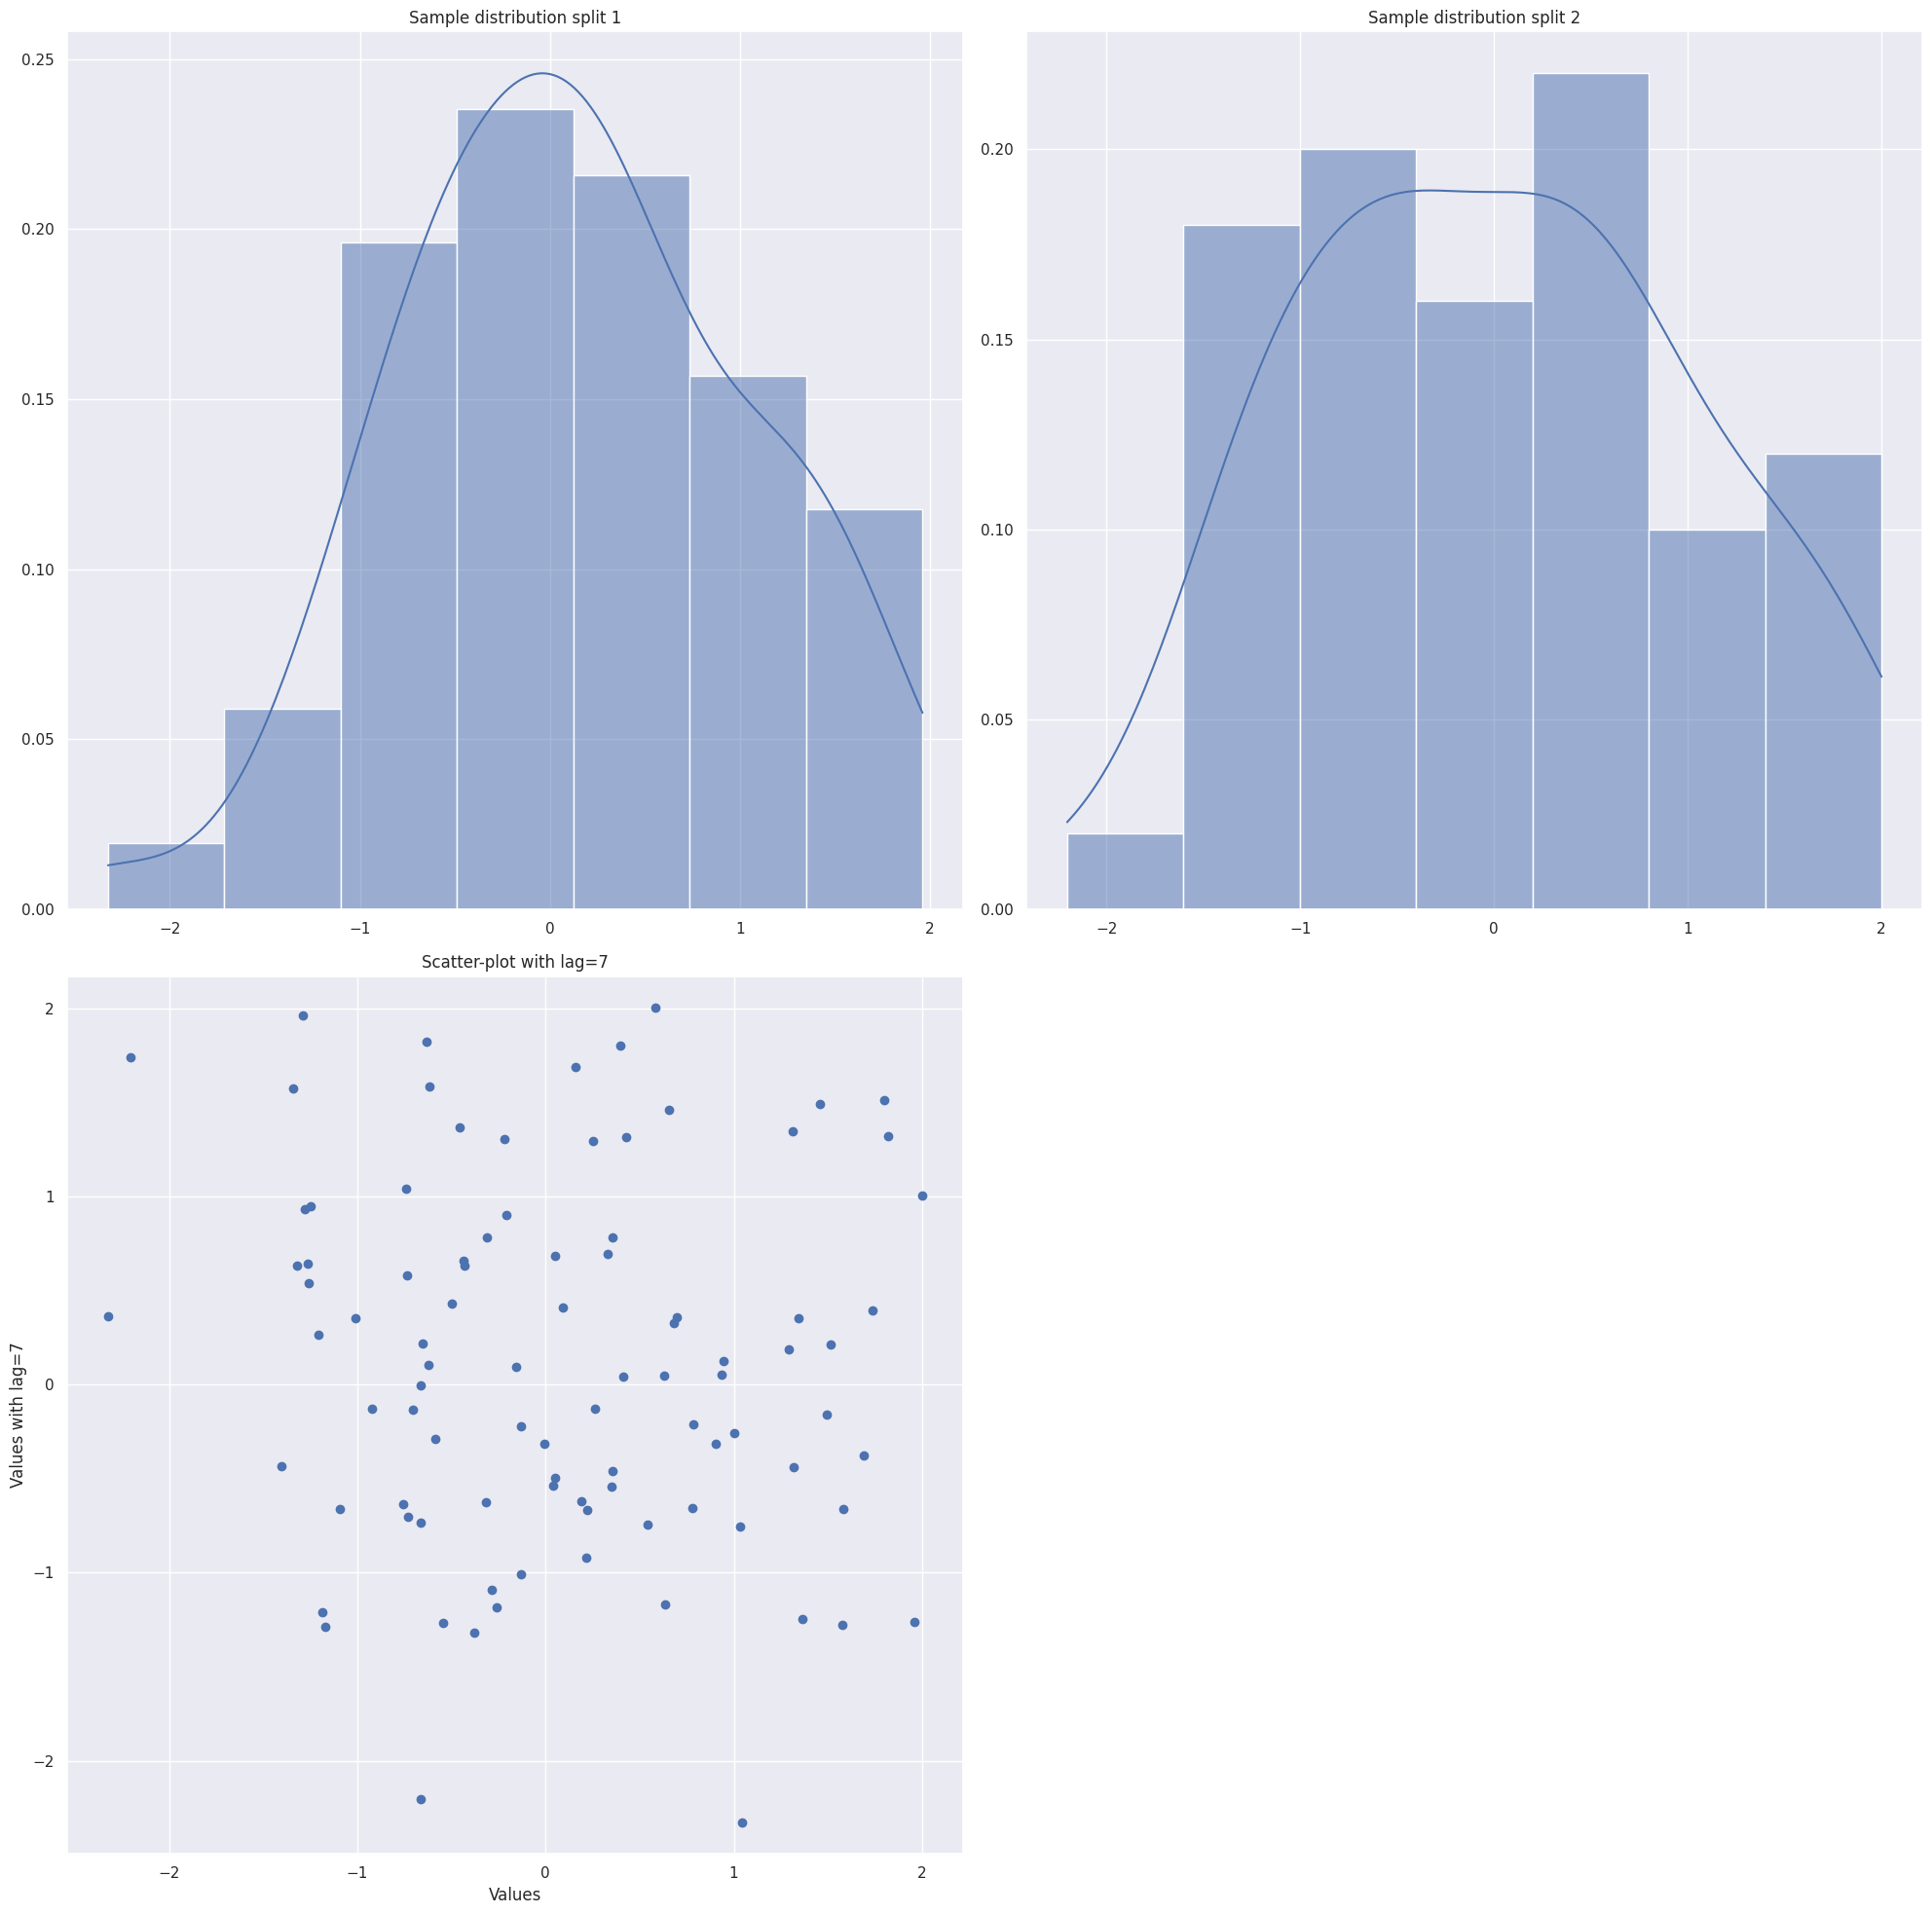

In [6]:
# Set inputs.
srs = cptetepl.Test_plots.get_plot_histograms_and_lagged_scatterplot1()
lag = 7
# TODO(Dan): Remove after integration with `cmamp`. Changes from Cm #4722 are not in `sorrentum` yet.
figsize = (20, 20)
cpvistte.plot_histograms_and_lagged_scatterplot(srs, lag, figsize=figsize)

## `plot_timeseries_distribution()`

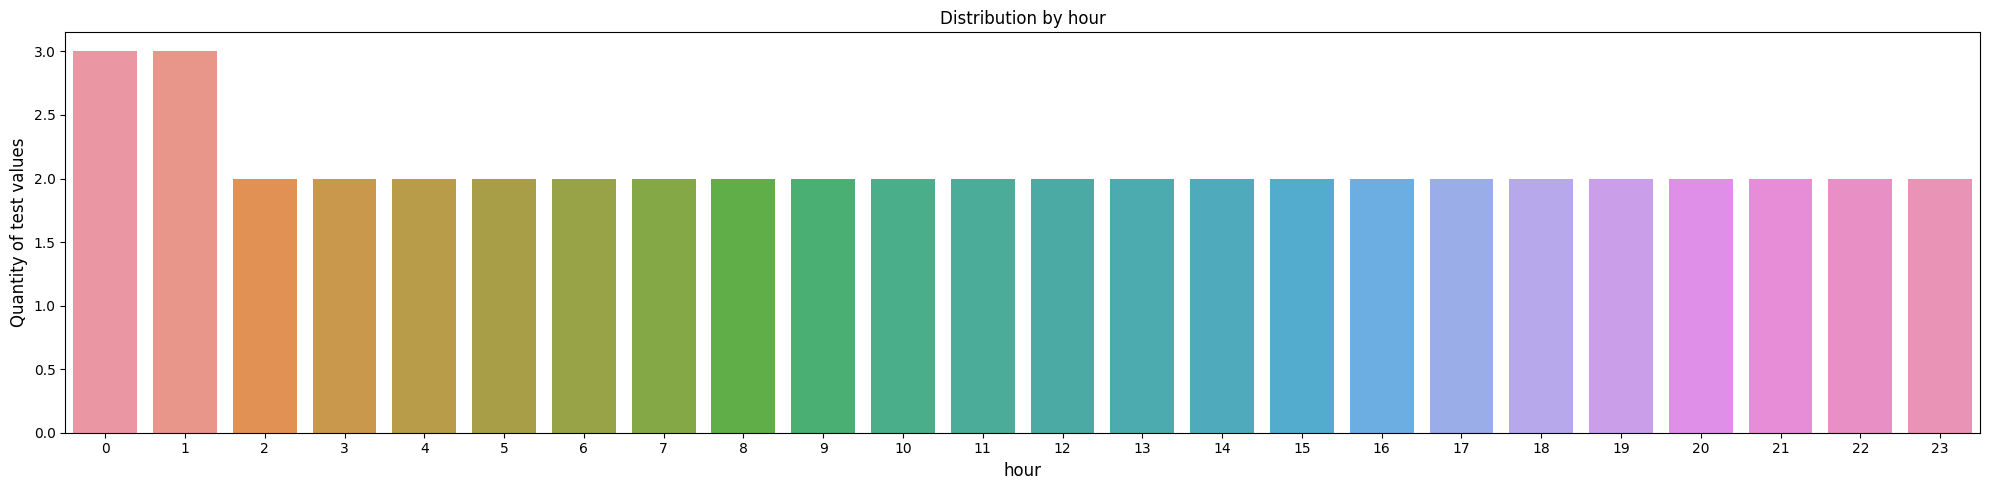

In [2]:
# Set inputs for hour interval.
cptetepl.Test_plots.setUpClass()
srs = cptetepl.Test_plots.get_plot_timeseries_distribution1()
datetime_types = ["hour"]
cplmiplo.plot_timeseries_distribution(srs, datetime_types)

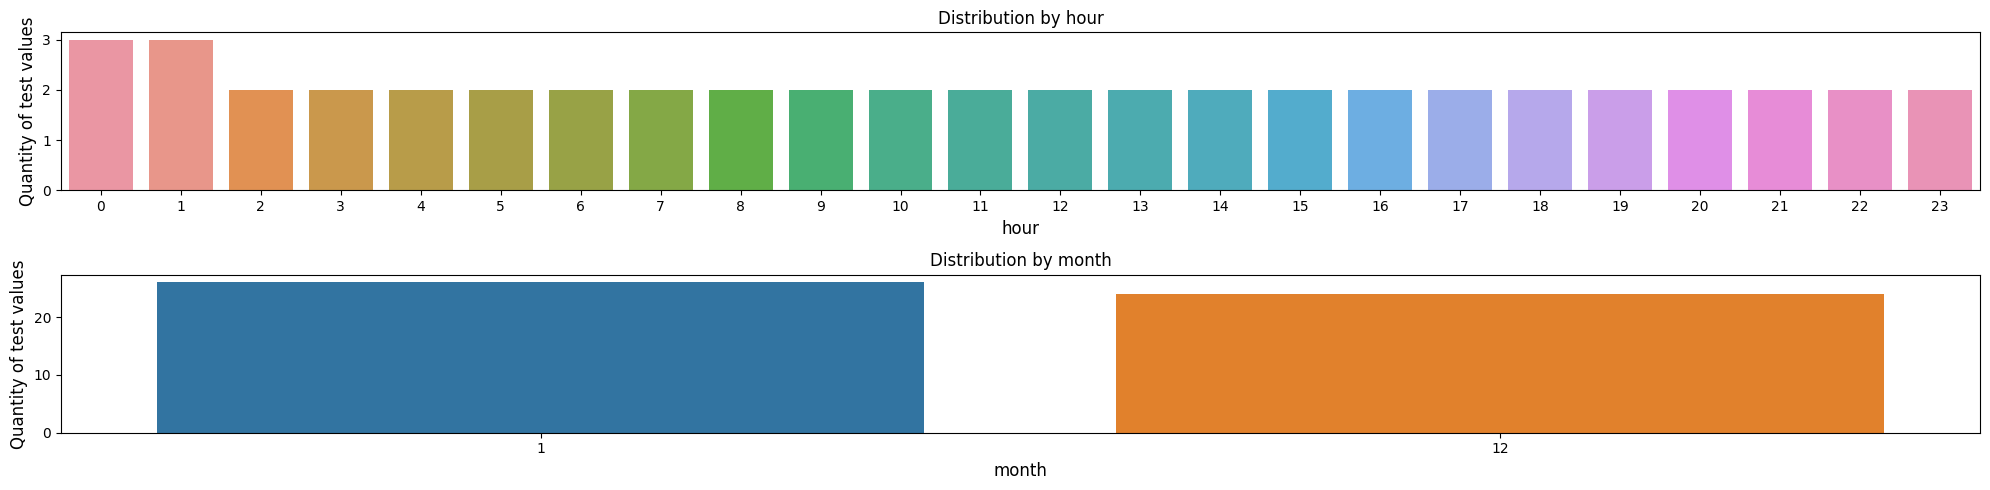

In [3]:
# Set input for hour and month interval.
srs = cptetepl.Test_plots.get_plot_timeseries_distribution1()
datetime_types = ["hour", "month"]
cplmiplo.plot_timeseries_distribution(srs, datetime_types)

## `plot_time_series_by_period()`

In [7]:
# Set inputs.
test_series = cptetepl.Test_plots.get_plot_time_series_by_period1()

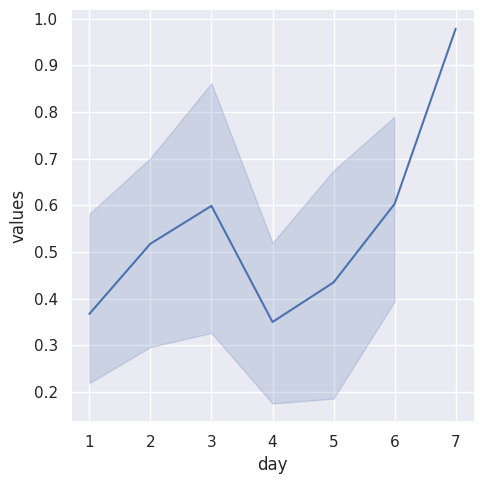

In [8]:
period = "day"
cplmiplo.plot_time_series_by_period(test_series, period)

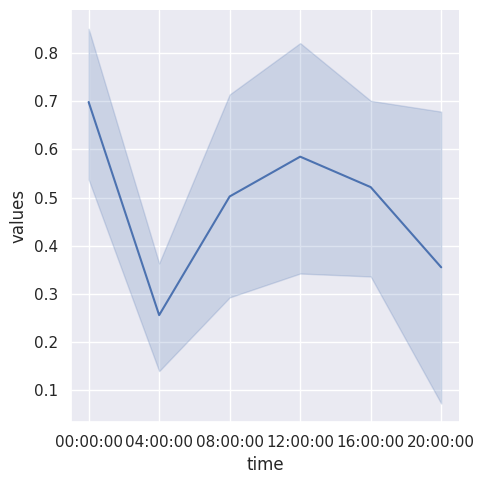

In [9]:
period = "time"
cplmiplo.plot_time_series_by_period(test_series, period)

## `plot_heatmap()`

/venv/lib/python3.8/site-packages/seaborn/matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


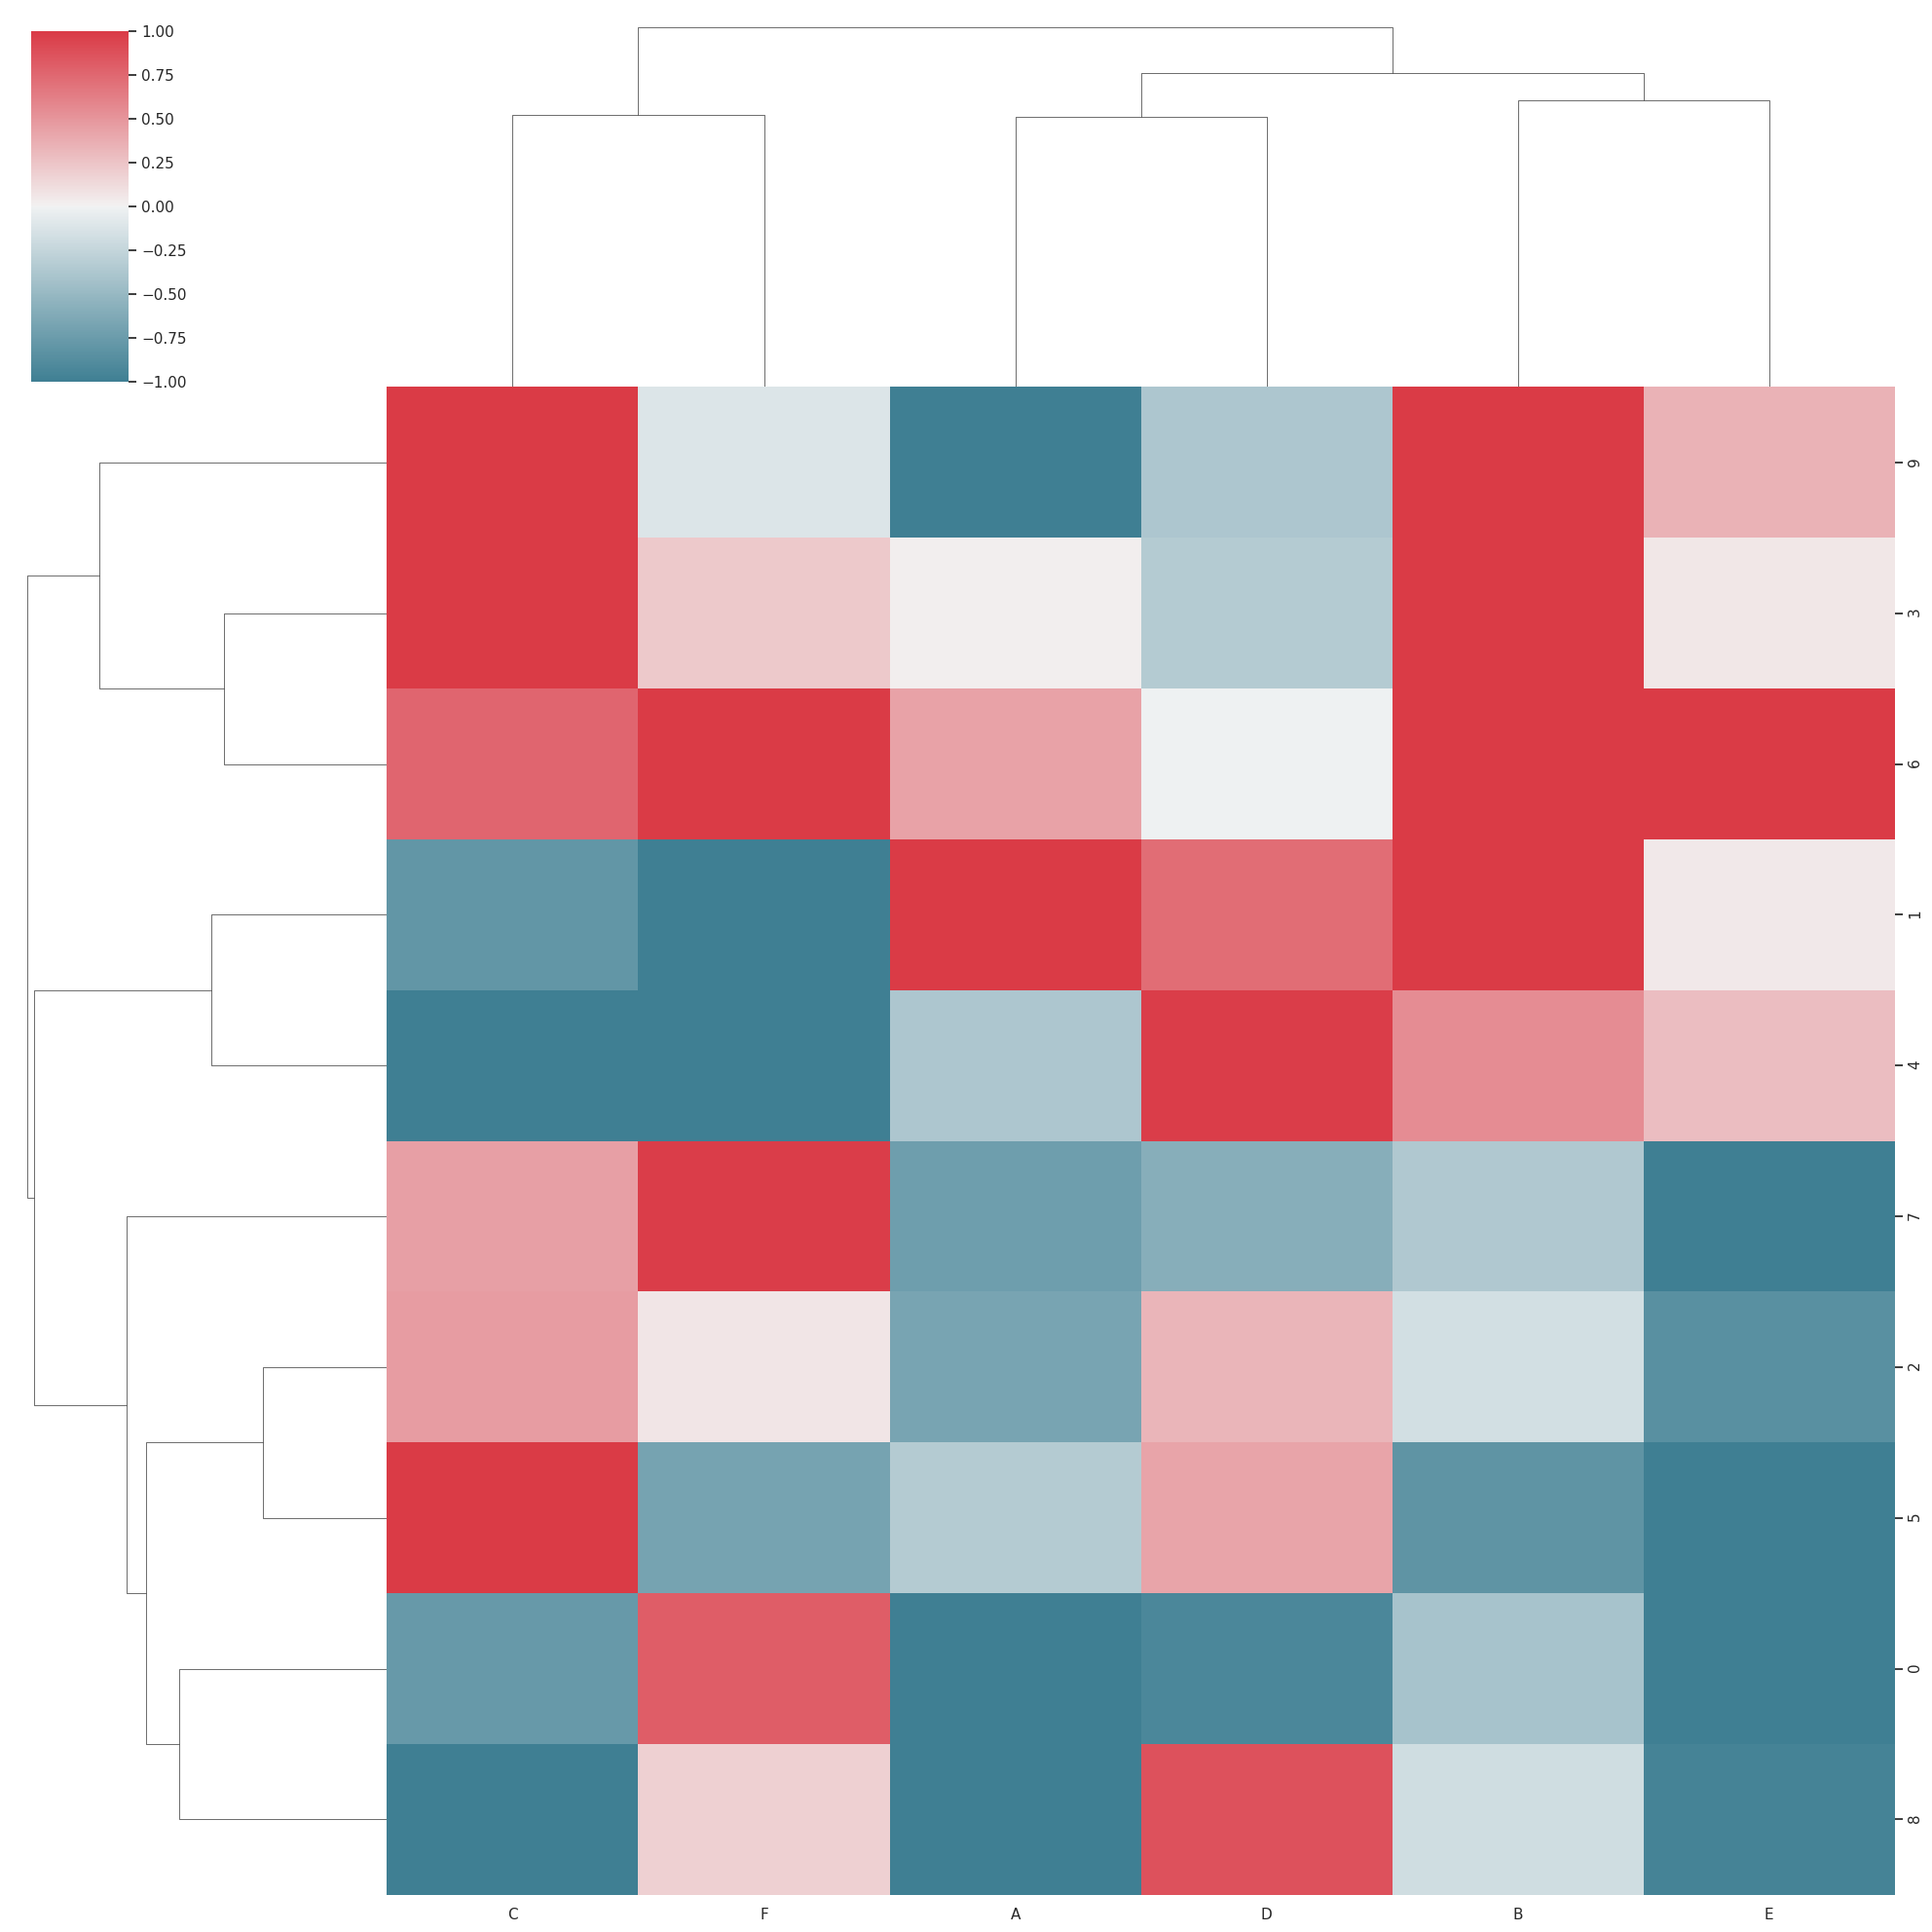

In [12]:
mode = "clustermap"
corr_df = cptetepl.Test_plots.get_plot_heatmap()
figsize = (20, 20)
cplocorr.plot_heatmap(corr_df, mode, figsize=figsize)

## `plot_effective_correlation_rank()`

In [4]:
# Set inputs.
test_df = cptetepl.Test_plots.get_plot_effective_correlation_rank1()

[3.1293542206314044, 2.66337985525306, 1.874877403870146]

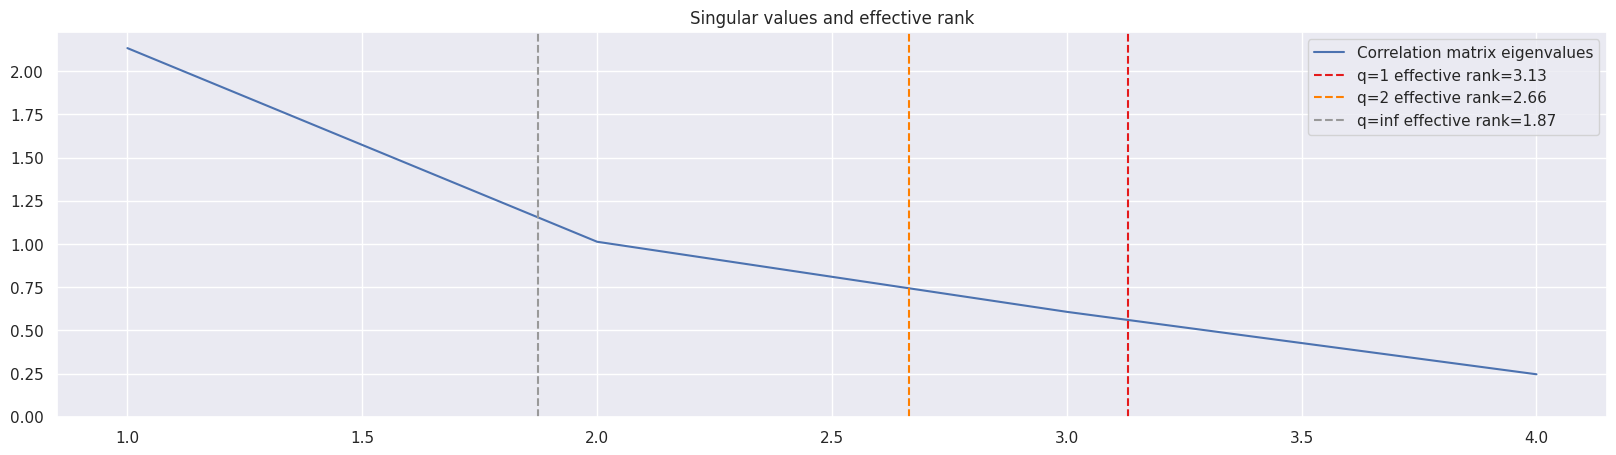

In [5]:
cplocorr.plot_effective_correlation_rank(test_df)

[2.4618630287916754,
 2.160007750529029,
 2.0111275318749793,
 2.20541696622087,
 2.028569479669278]

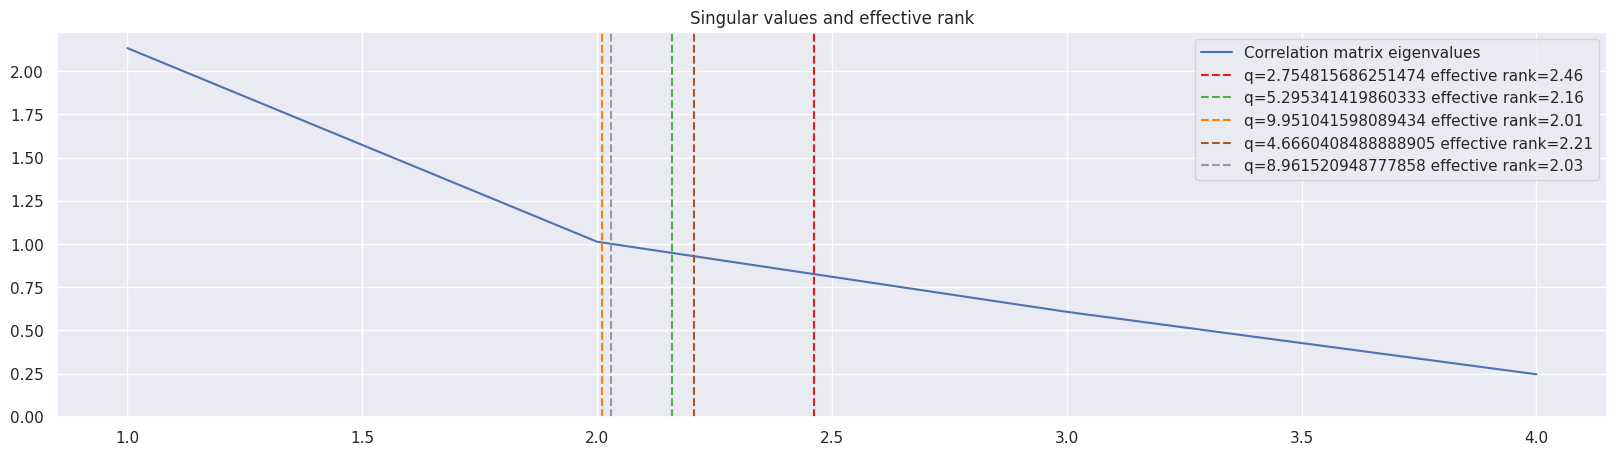

In [6]:
num_q_values = 5 
q_values = np.random.uniform(1, 10, num_q_values).tolist()
cplocorr.plot_effective_correlation_rank(test_df, q_values)

## `plot_spectrum()`

In [9]:
# Set inputs.
test_df = cptetepl.Test_plots.get_plot_spectrum1()

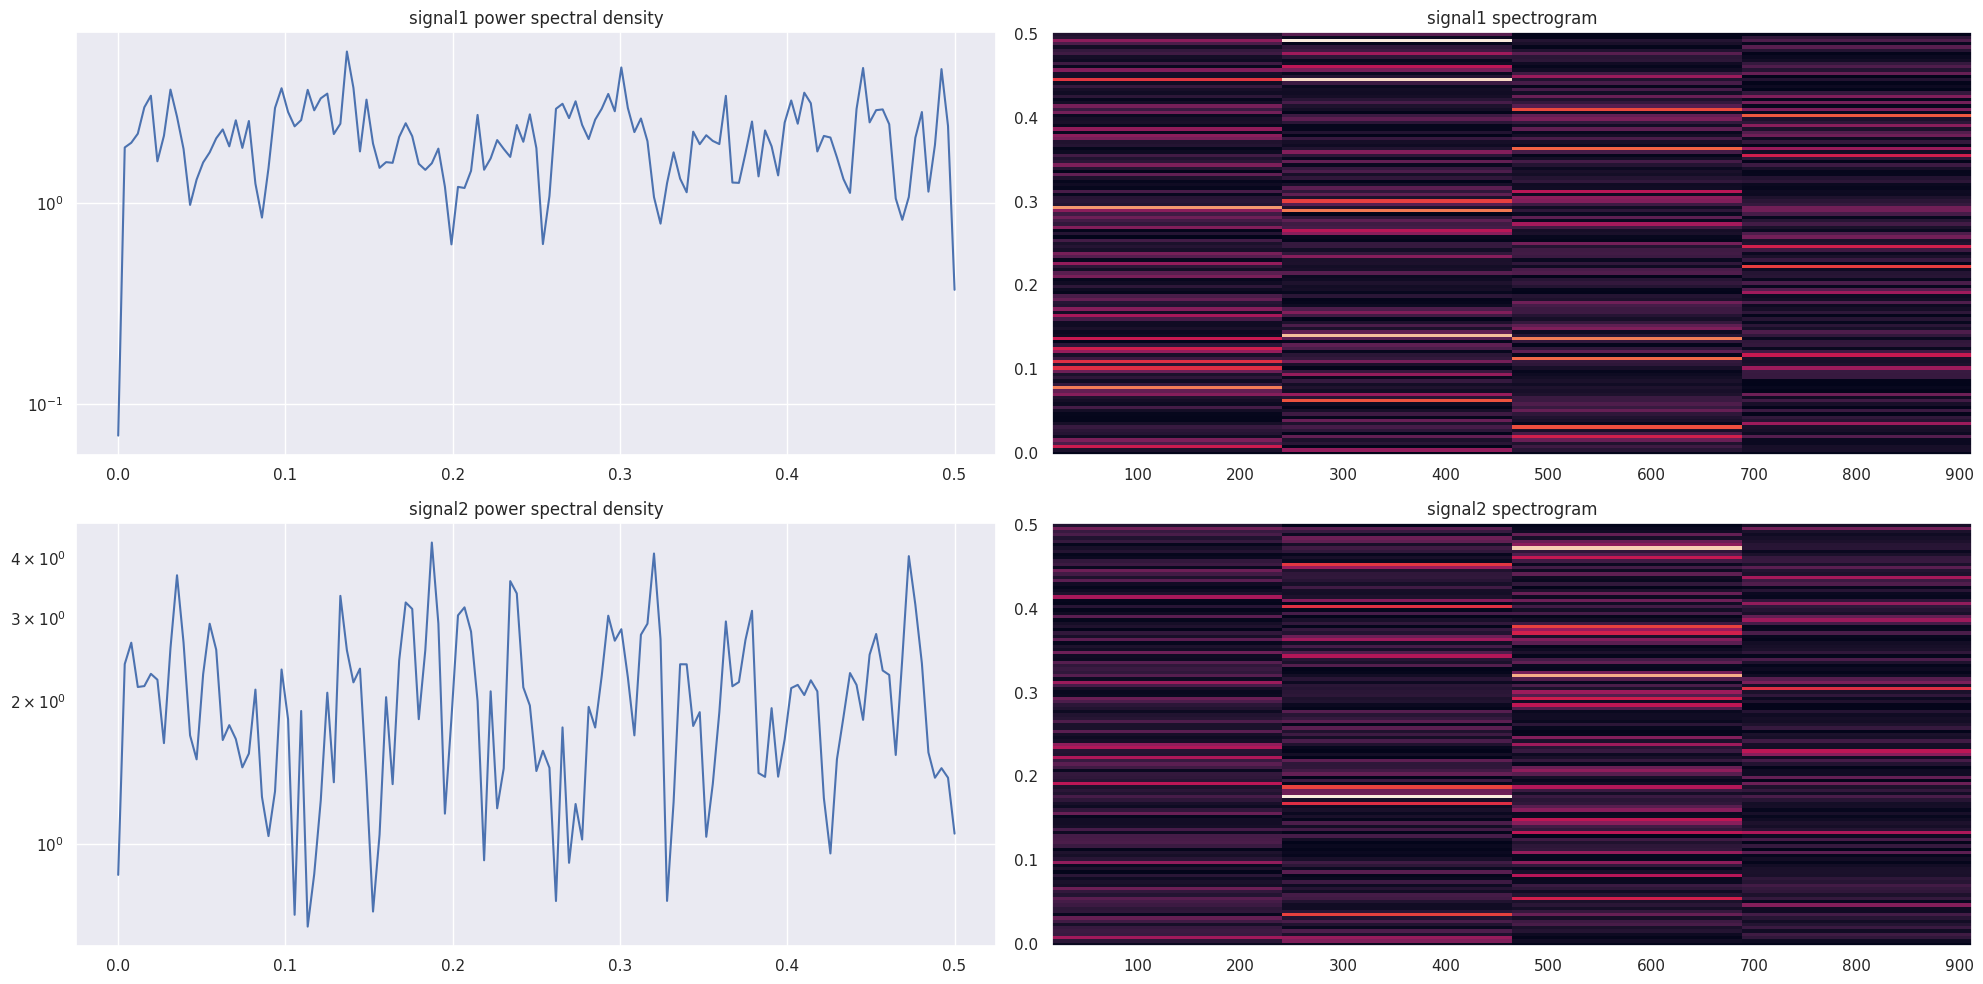

In [20]:
cplmiplo.plot_spectrum(test_df)

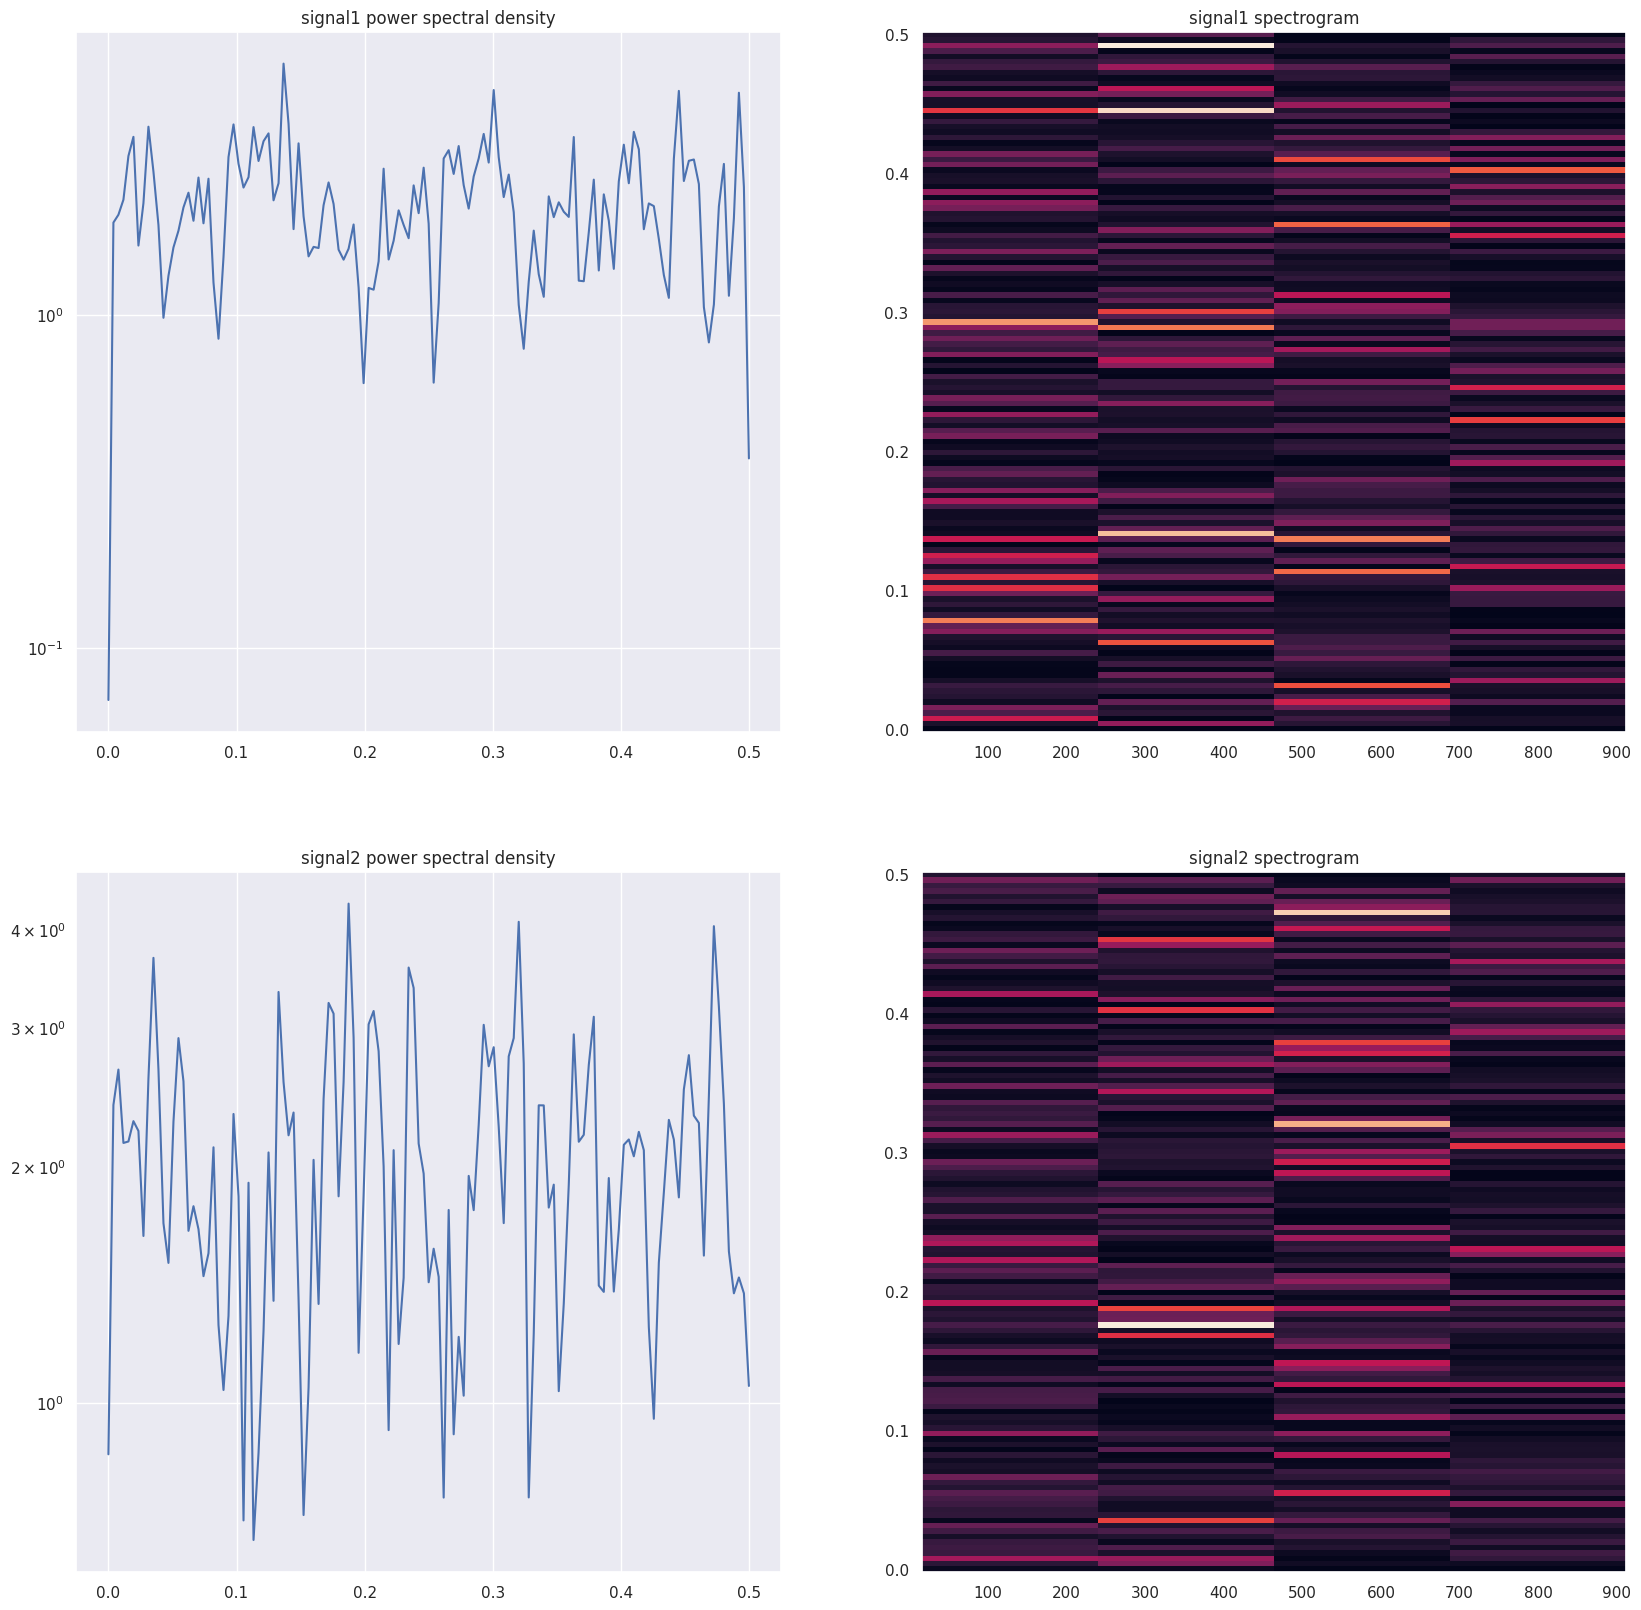

In [22]:
figsize = (20, 20)
_, axes = plt.subplots(2, 2, figsize=figsize)
axes_flat = axes.flatten()
cplmiplo.plot_spectrum(signal=test_df, axes=axes_flat)

## plot_projection()

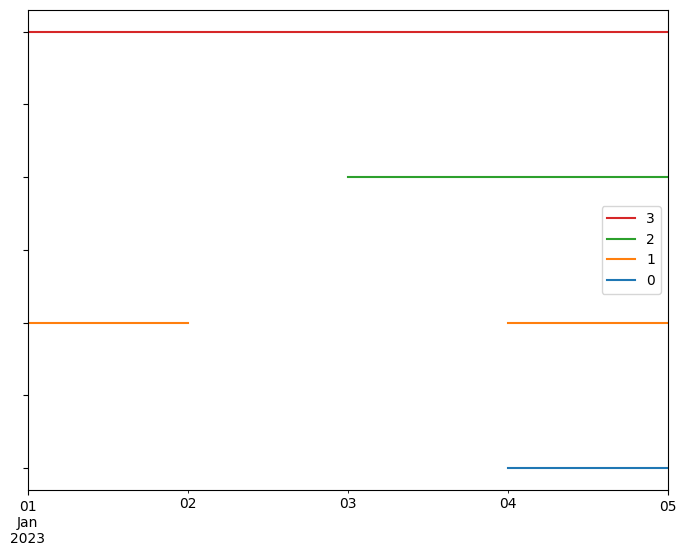

In [6]:
# Calling plot_projection to test that it's basic functionality works.
data = [
    [1, 1, 0, 1],
    [0, 1, 0, 1],
    [0, 0, 1, 1],
    [1, 1, 1, 1],
    [1, 1, 1, 1],
]
index = pd.date_range(start="2023-01-01", periods=len(data), freq="D")
df = pd.DataFrame(data, index=index)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
cplmiplo.plot_projection(df, special_values=[0], ax=ax)

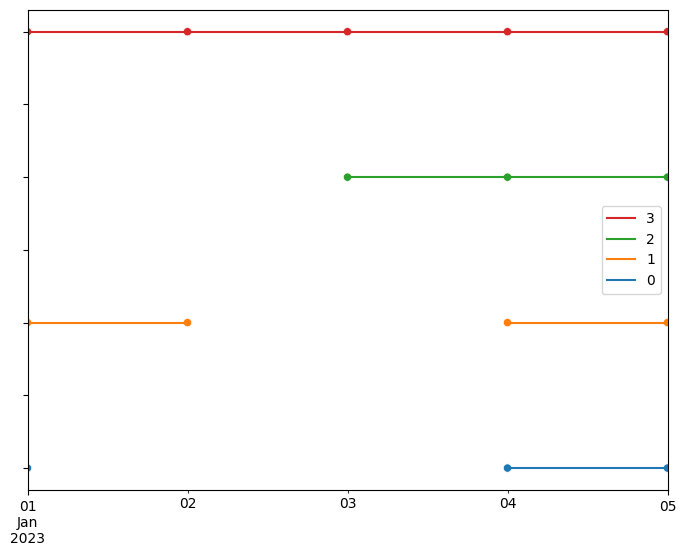

In [7]:
# Calling plot_projection with the scatter plot mode enabled.
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
cplmiplo.plot_projection(df, special_values=[0], mode="scatter", ax=ax)